In [245]:
# Nama   : Mia Amaliah 
# NIM    : 1202922002
# Tugas : PCA

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-potability/water_potability.csv


In [246]:
water = pd.read_csv ('../input/water-potability/water_potability.csv')
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [247]:
water.shape

(3276, 10)

In [248]:
water.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [249]:
water = water.dropna()
water.shape

(2011, 10)

In [250]:
#mengecek kembali data yang tidak valid
water.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<AxesSubplot:>

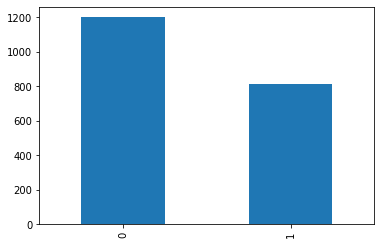

In [251]:
water['Potability'].value_counts().plot(kind = 'bar')

In [252]:
x=water.drop(['Potability'],axis=1).values
y=water['Potability'].values
print (x)
print (y)

[[8.31676588e+00 2.14373394e+02 2.20184174e+04 ... 1.84365245e+01
  1.00341674e+02 4.62877054e+00]
 [9.09222346e+00 1.81101509e+02 1.79789863e+04 ... 1.15582794e+01
  3.19979927e+01 4.07507543e+00]
 [5.58408664e+00 1.88313324e+02 2.87486877e+04 ... 8.39973464e+00
  5.49178618e+01 2.55970823e+00]
 ...
 [1.14910109e+01 9.48125452e+01 3.71888260e+04 ... 1.61727554e+01
  4.15585007e+01 4.36926431e+00]
 [6.06961576e+00 1.86659040e+02 2.61387802e+04 ... 1.20676196e+01
  6.04199211e+01 3.66971170e+00]
 [4.66810169e+00 1.93681735e+02 4.75809916e+04 ... 1.38944185e+01
  6.66876948e+01 4.43582091e+00]]
[0 0 0 ... 1 1 1]


In [253]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [254]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [255]:
pca = PCA(n_components =None)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
hasil_variance2 = pca.explained_variance_ratio_

In [256]:
print(hasil_variance2)

[0.13403761 0.13024587 0.1165278  0.11424662 0.11045179 0.10697446
 0.10463541 0.09717867 0.08570178]


In [257]:
pca = PCA(n_components = 2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
hasil_variance = pca.explained_variance_ratio_

In [258]:
print (hasil_variance)

[0.13403761 0.13024587]


In [259]:
print (x_train)

[[-0.47573731 -1.17921224]
 [-1.36596284 -0.73153767]
 [-0.54874487 -0.9099025 ]
 ...
 [ 0.55475071 -0.11684826]
 [-1.84662529 -0.84929103]
 [ 1.28435838 -1.86066074]]


In [260]:
print (x_test)

[[ 4.74012607e-01 -3.57498856e-01]
 [ 1.00377907e+00  5.13423693e-01]
 [-2.85895711e+00 -6.28340003e-01]
 [ 2.08722080e+00  8.00173307e-01]
 [ 4.13180631e-01 -1.06930294e-01]
 [ 1.99444390e+00 -4.59002535e-01]
 [-1.13777650e+00  7.38494372e-01]
 [-4.24172560e-01  8.21084729e-01]
 [-2.03124044e+00 -1.81700261e+00]
 [-6.66284884e-01 -1.84623166e-01]
 [ 6.87134586e-01  4.77403536e-01]
 [ 6.62418217e-01 -9.48658960e-01]
 [ 1.56670967e+00 -1.03848652e+00]
 [-7.75732327e-01  8.18914008e-01]
 [ 4.68306691e-01  7.68813093e-01]
 [ 2.76505340e+00 -1.89345057e+00]
 [ 4.51144955e-01 -6.43713059e-01]
 [ 9.59987827e-01 -6.18884531e-02]
 [-2.75577772e-02 -1.69305329e+00]
 [ 6.31426475e-01  1.11407476e+00]
 [ 1.60595311e+00  8.60144526e-01]
 [-4.11033739e-01 -2.02868985e+00]
 [ 3.91746813e-01 -5.89324469e-01]
 [ 7.64683613e-01  1.55162499e+00]
 [-1.18132406e+00  3.75099754e-02]
 [-2.97418589e-01  1.78500587e+00]
 [-5.80418990e-01  1.89535922e-01]
 [ 4.87389699e-02  9.27847078e-01]
 [ 1.01548556e+00  9

In [261]:
klasifikasi = LogisticRegression(random_state = 0)
klasifikasi.fit(x_train, y_train)
 

LogisticRegression(random_state=0)

In [262]:
y_pred = klasifikasi.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [263]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score (y_test,y_pred)
cr = classification_report (y_test,y_pred)

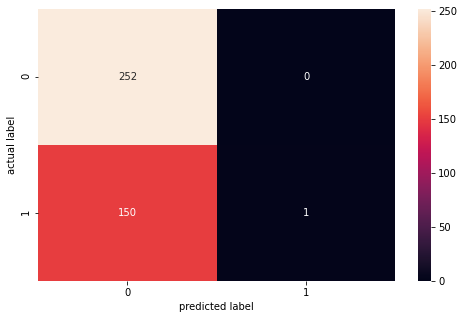

0.6277915632754343
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       252
           1       1.00      0.01      0.01       151

    accuracy                           0.63       403
   macro avg       0.81      0.50      0.39       403
weighted avg       0.77      0.63      0.49       403



In [264]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()

print (ac)
print (cr)

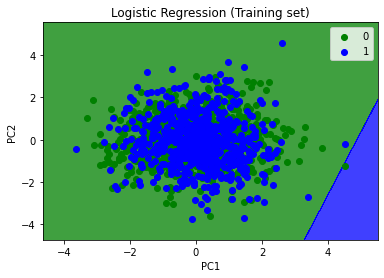

In [265]:
# Visualisasi Training Set
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, klasifikasi.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

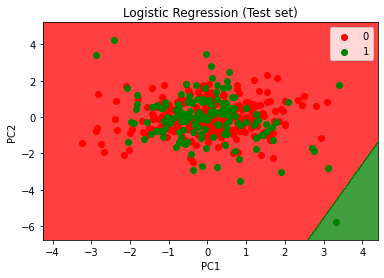

In [266]:
# Visualisasi Test Set
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, klasifikasi.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()